# **Bank Marketing Analysis - Combine Data Cleaning, Feature Selection, Modeling and Interpretability into one report** 
## **Assignment-4**
*For DSEM- Spring 2022*

Combining Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report.

The following must be answered:

1. What is the question?

2. What did you do?

3. How well did it work?

4. What did you learn?

## **Story of the Data...**

The data was obtained from the UCI website and is completely open source and free for use, here's the link below

https://archive.ics.uci.edu/ml/datasets/bank+marketing



Data Set Information:

### **1. What is the question?**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
## Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

## Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Importing Libraries

In [1]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import sklearn
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier)
from sklearn.metrics import roc_auc_score
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)

import shap

Reading the data directly from a csv posted on my Github

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jinudaniel/bank-marketing-analysis/master/banking_updated.csv")  
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Upon previous analysis of the dataset, I noticed that some features were useless to our cause, hence we are dropping those columns.

In [5]:
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [6]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,yes,no,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Checking for null values, because who wants to explore empty parts, just boring.

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Luckily there are no missing values in the dataset.

In [8]:
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

#Visualising the data

In [9]:
import seaborn as sns

Let's start with yes and no plots, since our analysis is based on whether the customer said 'yes' or 'no', and we'll compare features with the response to understand their significance towards the prediction.

<Axes: xlabel='y', ylabel='count'>

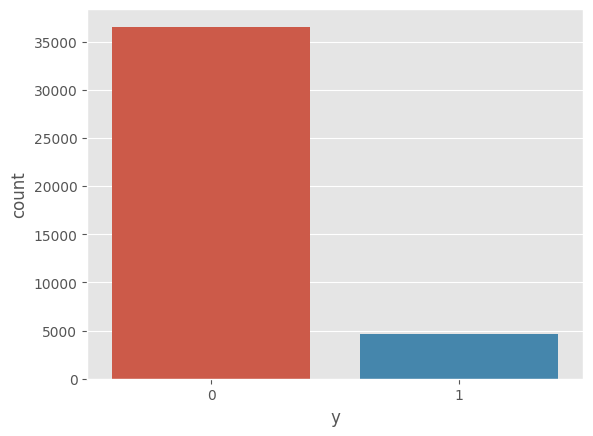

In [10]:
sns.countplot(x='y', data=df)

<Axes: xlabel='count', ylabel='job'>

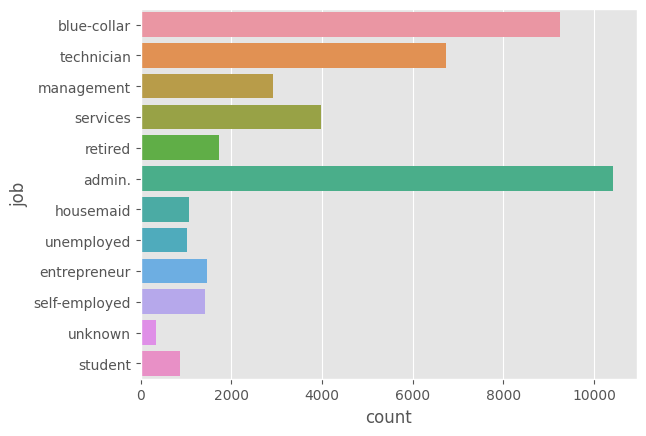

In [11]:
sns.countplot(y='job', data=df)

From the above plot, we can deduct that Admin, Blue-Collar and Technician are the biggest contributing job categories.

<Axes: xlabel='marital', ylabel='count'>

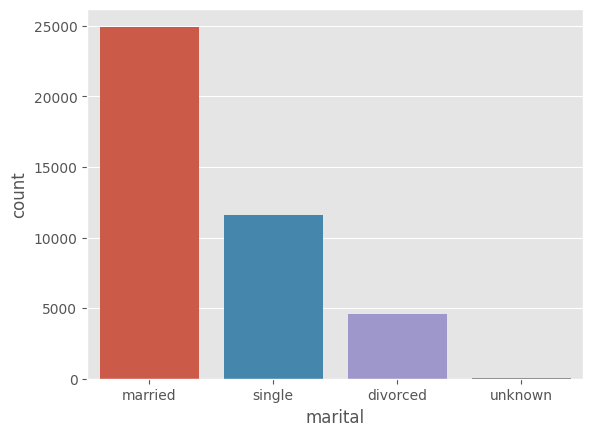

In [12]:
sns.countplot(x='marital', data=df)

In [13]:
df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

<Axes: xlabel='count', ylabel='education'>

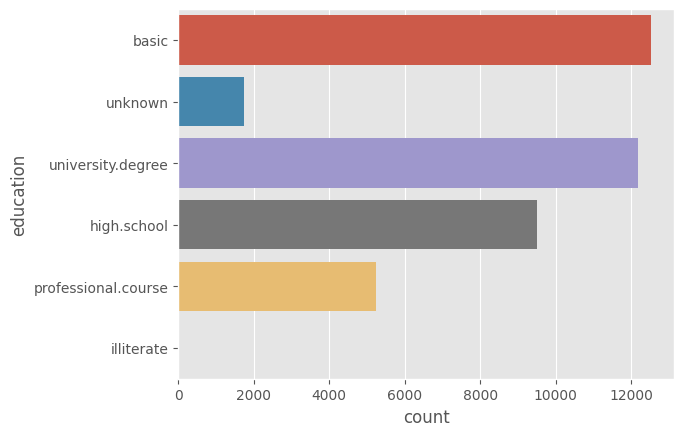

In [14]:
sns.countplot(y='education', data=df)

<Axes: >

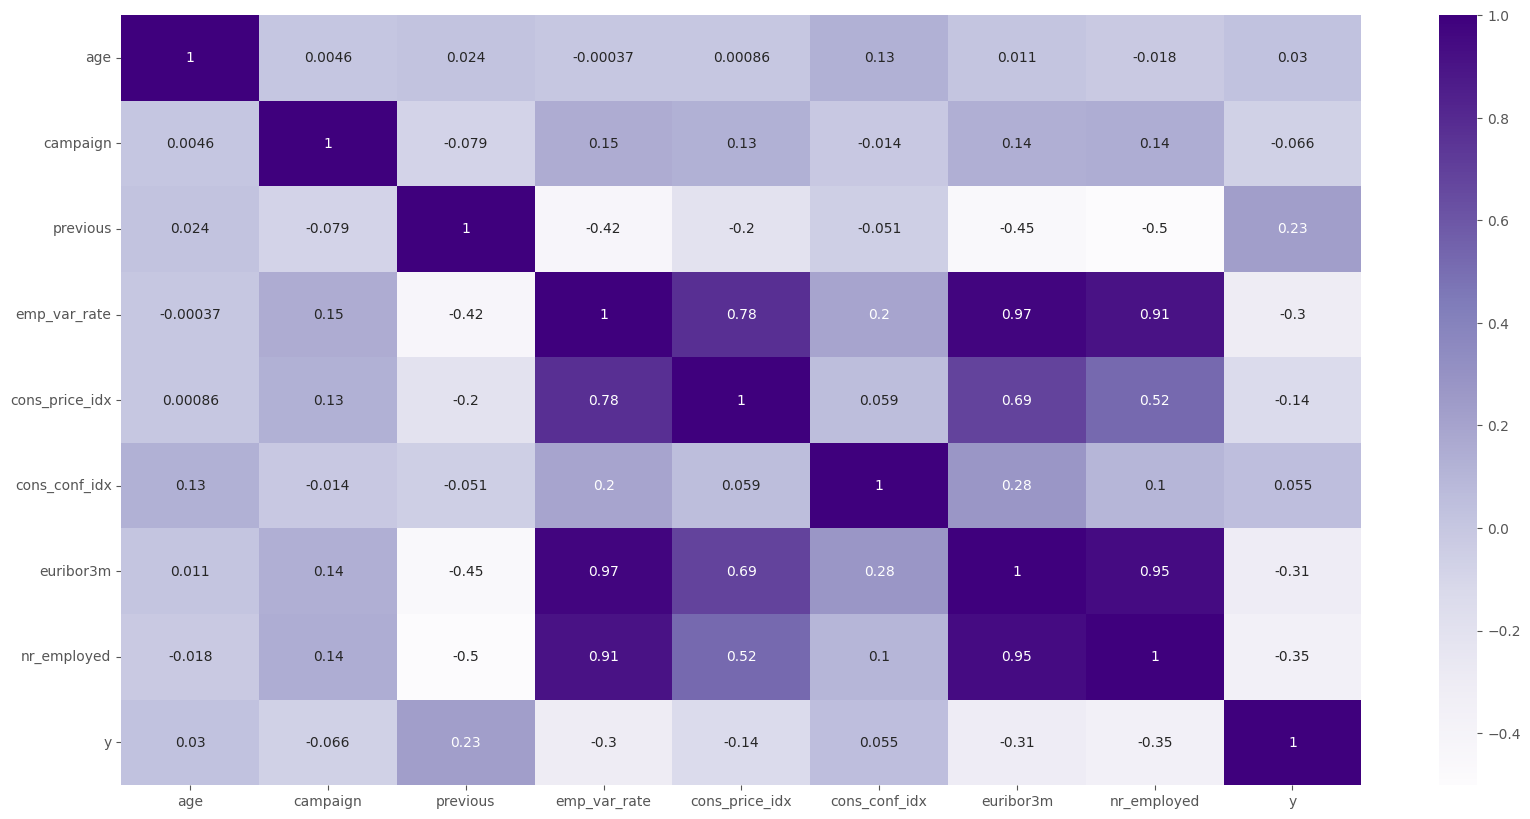

In [15]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="Purples") 

From the heatmap above, we can see that a few of the features share a very high correlation(the ones that are deep purple), like euribor3m, nr_employed and emp_var_rate, seems like these features will play an important role in our predictive analysis.



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



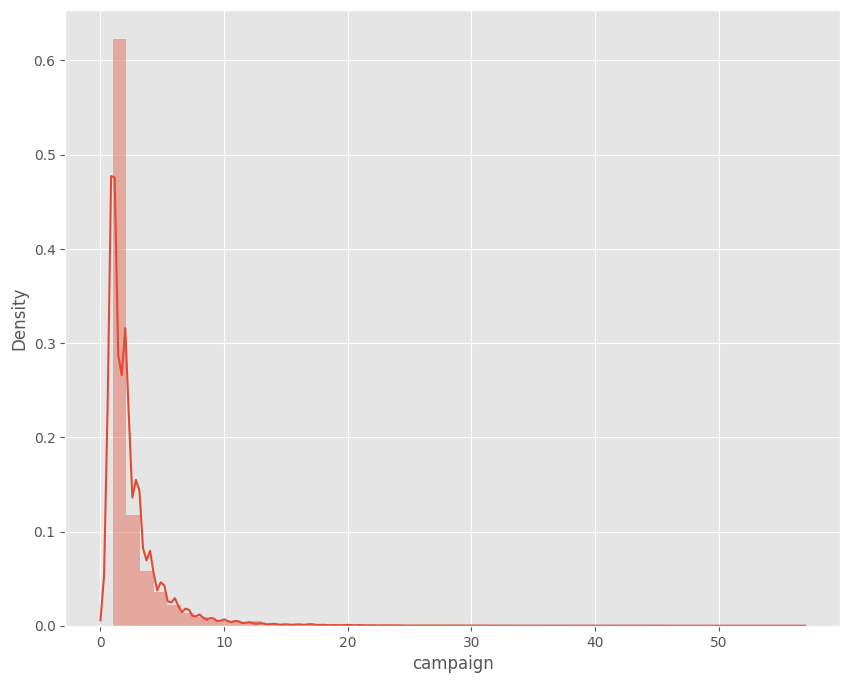

In [16]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df["campaign"])
plt.show()

Preprocessing our Categorical data to fit in the models to be used ahead

In logistic regression, the dependent variable is dichotomous, meaning it takes on only two possible values (e.g., 0 or 1, true or false, yes or no). The aim of logistic regression is to estimate the probability of the dependent variable taking a particular value given the values of the independent variables. Thus, we need to convert our categorical data accordingly.

In [17]:
le = preprocessing.LabelEncoder()

In [18]:
df.job = le.fit_transform(df.job)

In [19]:
df.marital = le.fit_transform(df.marital)

In [20]:
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)

In [21]:
df.shape

(41188, 15)

In [22]:
X = df.iloc[:,0:14]
X[0:10]

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,5,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,4,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,1,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2
5,30,4,0,0,2,0,8,0,1,1.4,93.918,-42.7,4.961,5228.1
6,37,1,1,0,2,0,1,0,1,-1.8,92.893,-46.2,1.327,5099.1
7,39,1,0,0,2,0,1,0,1,-1.8,92.893,-46.2,1.313,5099.1
8,36,0,1,4,0,0,1,1,2,-2.9,92.963,-40.8,1.266,5076.2
9,27,1,2,0,2,0,2,1,0,-1.8,93.075,-47.1,1.410,5099.1


All the categorical data is converted using the LabelEncoder

In [23]:
y = df.iloc[:,14]
y[0:10]

0    0
1    0
2    1
3    0
4    1
5    0
6    0
7    0
8    1
9    0
Name: y, dtype: int64

Defining a Test and Train split of 80/20

In [24]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split


In [25]:
x_train.shape, y_train.shape

((32950, 14), (32950,))

In [26]:
x_test.shape, y_test.shape

((8238, 14), (8238,))

Now that we have the Data prepped, let's build some models!

# **Logistic Regression**

Logistic regression is a statistical model used to analyze the relationship between a binary or categorical dependent variable and one or more independent variables. It is a type of regression analysis that models the probability of the occurrence of a particular outcome or event. For a case of Binary Classification like this, it's a well fitting choice given the dataset.

In [27]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [28]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
prediction=model.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9032532168001942

An accuracy of 90% on logistic regression means that the model correctly predicted the outcome of the dependent variable (binary or categorical) in 90% of the cases. In other words, for 90% of the observations, the predicted value of the dependent variable was the same as the actual value.



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


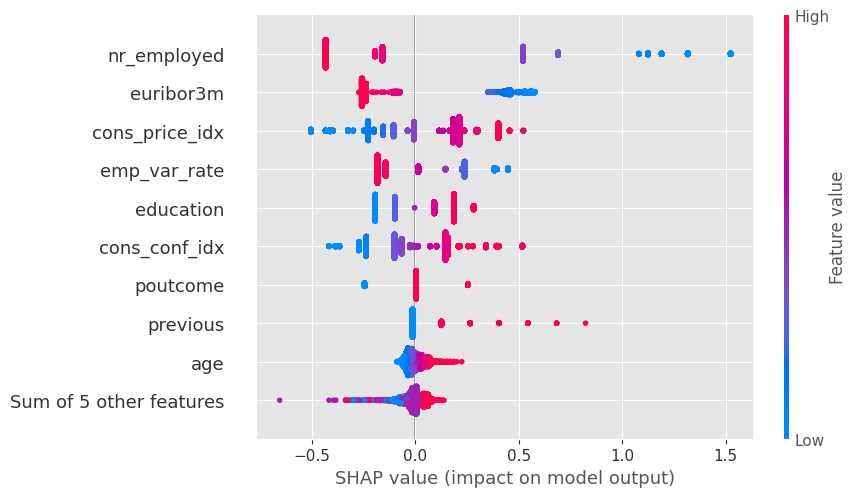

In [31]:
masker = shap.maskers.Independent(data = x_test)
model = LogisticRegression(random_state=1)
model.fit(x_train, y_train)

explainer = shap.LinearExplainer(model, masker=masker)
shap_values = explainer(x_test)

shap.plots.beeswarm(shap_values)

The logistic regression model estimates the log odds  of the dependent variable taking a particular value, given the values of the independent variables. The log odds are then transformed into probabilities using the logistic function.

The regression coefficients in logistic regression represent the change in the log odds of the dependent variable associated with a one-unit change in the corresponding independent variable. For example, if the regression coefficient for an independent variable is 0.5, then a one-unit increase in that variable would increase the log odds of the dependent variable taking the value of 1 by 0.5, holding all other variables constant.

we see that lower values of nremployed have positive SHAP values (the points extending towards the right are increasingly blue) and higher values of nremployed have negative SHAP values (the points extending towards the left are increasingly red). This indicates that employed people had a higher chance of subscribing which makes sense. The reverse is seen for euribor3m and age noticabely.

# **Imputation**

In [42]:
# Funtion to create % of missing data
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

## **Mean Method:**

In [43]:
df

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,5,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,4,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,1,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,1,0,2,1,0,1,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,3,1,0,0,0,2,0,1,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,0,2,4,2,2,3,0,1,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,9,1,3,0,2,2,0,1,-3.4,92.431,-26.9,0.742,5017.5,0


In [44]:
from sklearn.metrics import mean_squared_error

# Imputing data to analyse influence on variables
df['age_1_percent'] = df[['age']].copy(deep=True)
df['age_5_percent'] = df[['age']].copy(deep=True)
df['age_10_percent'] = df[['age']].copy(deep=True)

# Create missing data
create_missing(df, 0.01, 'age_1_percent')
create_missing(df, 0.05, 'age_5_percent')
create_missing(df, 0.1, 'age_10_percent')

# Verify % of missing data
print(df[['age', 'age_1_percent', 'age_5_percent', 'age_10_percent']].isnull().sum() * 100 / len(df))

# Replace missing values with mean
mean = df['age'].mean(axis = 0)
df.fillna(value=mean, inplace = True)
print('Mean =', mean)

# Calculating Mean Square Error
mse1 = mean_squared_error(df['age_1_percent'], df['age'], squared = False)
mse5 = mean_squared_error(df['age_5_percent'], df['age'], squared = False)
mse10 = mean_squared_error(df['age_10_percent'], df['age'], squared = False)

rmse = [mse1, mse5, mse10]
for err in rmse:
  print('rmse = ' + str(round(err, 2)))

age                0.000000
age_1_percent      1.000291
age_5_percent      4.999029
age_10_percent    10.000486
dtype: float64
Mean = 40.02406040594348
rmse = 1.04
rmse = 2.34
rmse = 3.26


## **Mode Method:**

In [45]:
from sklearn.metrics import mean_squared_error

# Imputing data to analyse influence on variables
df['age_1_percent'] = df[['age']].copy(deep=True)
df['age_5_percent'] = df[['age']].copy(deep=True)
df['age_10_percent'] = df[['age']].copy(deep=True)

# Create missing data
create_missing(df, 0.01, 'age_1_percent')
create_missing(df, 0.05, 'age_5_percent')
create_missing(df, 0.1, 'age_10_percent')

# Verify % of missing data
print(df[['age', 'age_1_percent', 'age_5_percent', 'age_10_percent']].isnull().sum() * 100 / len(df))

# Replace missing values with mean
mean = df['age'].median(axis = 0)
df.fillna(value=mean, inplace = True)
print('Median =', mean)

# Calculating Mean Square Error
mse1 = mean_squared_error(df['age_1_percent'], df['age'], squared = False)
mse5 = mean_squared_error(df['age_5_percent'], df['age'], squared = False)
mse10 = mean_squared_error(df['age_10_percent'], df['age'], squared = False)

rmse = [mse1, mse5, mse10]
for err in rmse:
  print('rmse = ' + str(round(err, 2)))

age                0.000000
age_1_percent      1.000291
age_5_percent      4.999029
age_10_percent    10.000486
dtype: float64
Median = 38.0
rmse = 1.06
rmse = 2.35
rmse = 3.42


## **KNN Method:**

In [46]:
df

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,age_1_percent,age_5_percent,age_10_percent
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0,44.0,44.0,38.0
1,53,9,1,5,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0,53.0,53.0,53.0
2,28,4,2,4,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6,1,28.0,28.0,28.0
3,39,7,1,1,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1,0,39.0,39.0,39.0
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2,1,55.0,55.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,1,0,2,1,0,1,1.4,94.465,-41.8,4.866,5228.1,0,59.0,59.0,59.0
41184,31,3,1,0,0,0,2,0,1,1.1,93.994,-36.4,4.860,5191.0,0,31.0,31.0,31.0
41185,42,0,2,4,2,2,3,0,1,1.1,93.994,-36.4,4.857,5191.0,0,42.0,42.0,42.0
41186,48,9,1,3,0,2,2,0,1,-3.4,92.431,-26.9,0.742,5017.5,0,48.0,48.0,48.0


In [47]:
from sklearn.impute import KNNImputer

# Imputing data to analyse influence on variables
df['age_1_percent'] = df[['age']].copy(deep=True)
df['age_5_percent'] = df[['age']].copy(deep=True)
df['age_10_percent'] = df[['age']].copy(deep=True)

# Create missing data
create_missing(df, 0.01, 'age_1_percent')
create_missing(df, 0.05, 'age_5_percent')
create_missing(df, 0.1, 'age_10_percent')

# Verify % of missing data
print(df[['age', 'age_1_percent', 'age_5_percent', 'age_10_percent']].isnull().sum() * 100 / len(df))
temp = df[['age', 'campaign', 'previous', 'emp_var_rate','cons_price_idx', 'cons_conf_idx','euribor3m', 'nr_employed']]
neighbours = 5
knn = KNNImputer(n_neighbors = neighbours)
data1 = pd.DataFrame(knn.fit_transform(temp), columns = temp.columns)

age                0.000000
age_1_percent      1.000291
age_5_percent      4.999029
age_10_percent    10.000486
dtype: float64


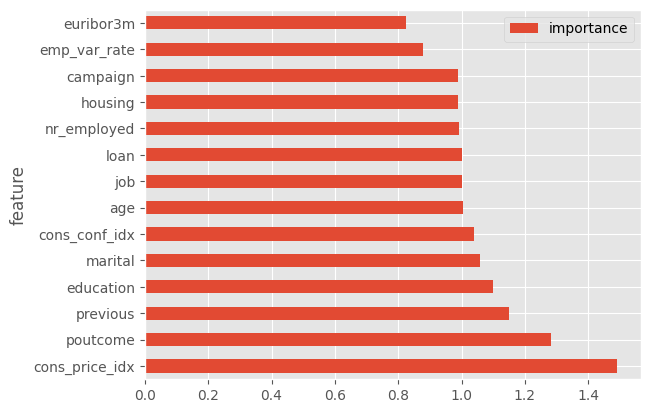

In [48]:
# Feature importance

import math

features = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


w0 = model.intercept_[0]
w = model.coef_[0]
feature_importance = pd.DataFrame(features, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

* Which independent variables are useful to predict a target (dependent variable)?

nr.employed, emp.var.rate and euribor3m are three closely interdependent features with correlations in combiantions as high as 97% which added to the yes or no prediction heavily with, hence, being a multicolinearity plotted with heat maps and different comparative charts above. With rankings of the feature that go as following:
nr.employed
emp.var.rate
poutcome_success
euribor3m


* Which independent variable have missing data? How much? 
There was no missing data.

* Do the training and test sets have the same data?
Taken from the same dataset but divided over time of 2 years, hence gave enough variance across a period of time to be tested and have meaningful results.

* In the predictor variables independent of all the other predictor variables?

Varies, some of the features were completely independent whereas some had high multicolinearity as seen in the heat map and Q-Q plots.

* Which predictor variables are the most important?

In ranking:

nr.employed
emp.var.rate
poutcome_success
euribor3m


* Do the ranges of the predictor variables make sense?

The ranges did make sense for most features like age but period of time like days, weeks and. months as that was an expected change and moved periodically, but did not add to the prediction state of matter.

* What are the distributions of the predictor variables? 

The column y which had Y or N as an output was havily imbalanced with a difference of 8x the number, which was the goal to be predicted. The predictor variables which added the highest importance had heavily multi-colinearity and were distributed similarly, but some that were distributed too evenly across days like the week.

# SVM

SVM works by finding the best possible hyperplane that separates the different classes of data points. In SVM, the goal is to find the hyperplane that maximizes the margin, which is the distance between the hyperplane and the closest data points of each class.

In [49]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[7263   62]
 [ 735  178]]


In [51]:
from sklearn.svm import SVC
clf = SVC()

In [52]:
clf.fit(x_train, y_train)

SVC()

In [53]:
pred = clf.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8891721291575625

An accuracy of 88.9% in SVM means that the model correctly classified 88.9% of the total number of data points in the test set. This means that 88.9% of the predicted labels for the test set matched the actual labels.

# Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to make a final prediction.

The idea behind random forest is to train multiple decision trees on different subsets of the training data and different subsets of the features. The decision trees are trained using a technique called bagging, which involves randomly selecting subsets of the data with replacement and using these subsets to train the individual trees.



In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [56]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
predict = rfc.predict(x_test)

In [58]:
accuracy_score(y_test, predict)

0.8935421218742413

An accuracy of 89% on a random forest classifier means that the model correctly classified 89% of the total number of data points in the test set.

In [59]:
rfc.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=1782586773)

In [60]:
# pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot_data = export_graphviz(rfc.estimators_[20], 
#                            feature_names=features,
#                            filled=True, impurity=True, 
#                            rounded=True)

# graph = graphviz.Source(dot_data, format='png')
# graph

KeyboardInterrupt: ignored

Random Forest is a powerful machine learning model that functions as an ensemble of multiple decision trees. Each decision tree is trained on a random subset of the features and data, and the final prediction of the Random Forest model is determined by aggregating the predictions of all the individual trees.

However, this approach can also make Random Forest a black box model, as it can be difficult to interpret the decisions made by the individual trees and how they contribute to the final prediction. As the number of decision trees in the ensemble increases, it can become increasingly difficult to interpret the output of the model.

In particular, when using Random Forest for classification tasks, it can be challenging to interpret the specific nodes or features that are most important for making a given classification decision. This can be important for understanding the underlying patterns in the data and for identifying potential areas for improvement in the model.

Despite these challenges, there are several techniques that can be used to help interpret the output of Random Forest models. For example, feature importance scores can be calculated to identify the most important features for making a given prediction. Additionally, techniques such as partial dependency plots can be used to visualize the relationship between a specific feature and the predicted outcome of the model, which is plotted below.

<BarContainer object of 14 artists>

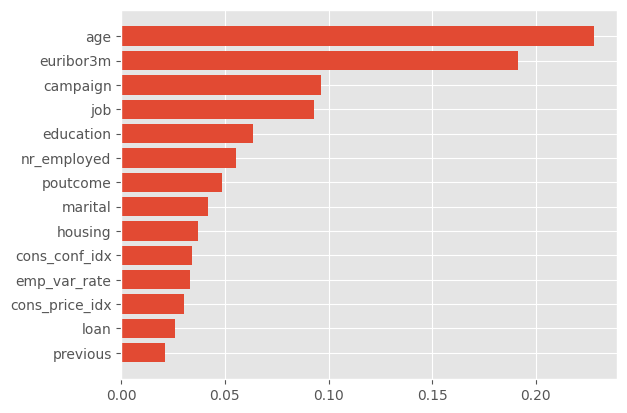

In [62]:
sorted_idx = rfc.feature_importances_.argsort()
features = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
result = sorted(zip(features, rfc.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

We can see that age, euribor3m, job and campaign are heavy contributors to the model and previous and loan being the lowest. It makes sense, as with age, wealth accumulates and the type of job would dictate the amount of income and the chance of subscribing to the bank's product.

# **Partial Dependency Plots**

PDPs show how the predicted response of a model changes as the value of a single predictor variable changes, while holding all other predictor variables constant.

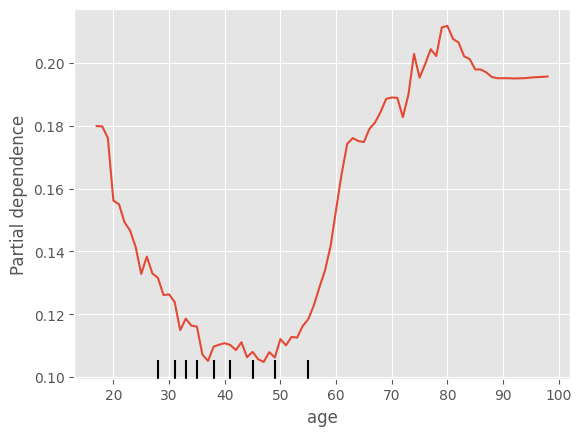

In [63]:
var = 'age'
PartialDependenceDisplay.from_estimator(rfc, x_train, [var]);

In [ ]:
n_cols = 2
n_rows = int(len(x_train.columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 12))
PartialDependenceDisplay.from_estimator(rfc, x_train, x_train.columns, ax=ax, n_cols=n_cols)
fig.suptitle('Partial Dependence Plots')
fig.tight_layout();

PDPs show the average predicted outcome of a model as a function of a specific input feature, while holding all other features constant.



From the above PDPs we can infer that housing, loan and education perform similarly as they are flat lining and not contributing to the prediction heavily. nremployed and empvarrate were similar with both starting off with high partial dependence but dip at the ends. Age, poutcome and euribor3m were consistent with their values, not being entirely skewed. cons_conf_idx is not affecting the model positively at any sense.

# Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

A sequential neural network, also known as a feedforward neural network, is a type of neural network in which the neurons are arranged in layers that process the input data sequentially. The input data is passed through the network one layer at a time, with each layer transforming the input in some way before passing it on to the next layer. Thus helpful in our case of data structure type

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=14, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

Adding another sigmoid function layer after the initial dense layer

The sigmoid function is a mathematical function that maps any input value to a value between 0 and 1, making it suitable for binary classification tasks.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [ ]:
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)

Training over 10 epochs or batches with the batch size of 128. Initially, I started with a 100 epochs but the model reaches a stable accuracy after a few instances.

In [ ]:
scores = model.evaluate(np.array(x_test), np.array(y_test))

In [ ]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

The model is able to accurately classify new data points with an accuracy of 88.92%.

In [ ]:
# SHAP Analysis

scaler = StandardScaler().fit(x_train[features])

x_train[features] = scaler.transform(x_train[features])
x_test[features] = scaler.transform(x_test[features])

explainer = shap.KernelExplainer(model, x_train.iloc[:50,:])
shap_values = explainer.shap_values(x_train.iloc[20,:], nsamples=500)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[20,:])

The variables with SHAP values that push the model towards subscription as 'yes' appear on the left as red, whereas those that push t towards 'no' appear on the right in blue. Variables with larger shap values have larger arrows. The f(x) can be seen at 0.33 as an average of chance of subsciption and base is at 0.426

age, marital, cons_conf-index and cons_price_index are blue and pushing the model towards 'no' , whereas, Housing, education loan and other pushing them towards a yes, but we can see that there is a heavy weightage towards the blue side

# **LIME**

In [32]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import lime
import lime.lime_tabular

In [34]:
x = ['job', 'marital', 'education', 'housing', 'loan', 'campaign', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
y = ['age']

In [35]:
X = df[x]
X.info()

Y = df[y]
Y.head()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [37]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
feature_names=X_train.columns,
class_names=['Life expectancy'],
verbose=True,
mode='regression')

In [38]:
i = np.random.randint(0, X_test.shape[0])

In [39]:
# explain the prediction of the XGBoost model on the selected sample
exp = explainer.explain_instance(X_test.iloc[i], rf.predict, num_features=20)

# visualize the explanation with a bar chart
exp.as_pyplot_figure(label=i)


In [40]:
exp = explainer.explain_instance(X_test.iloc[i], rf.predict, num_features=20)

In [41]:
# display the explanation table in a Jupyter notebook
exp.show_in_notebook(show_table=True, show_all=False)

For above models, the following features have a positive impact on predicting the life expectancy. These features are displayed in orange in the above interpreation for each algorithm.
marital, job, cons_conf_idx

The following features have a negative impact on predicting the life expectancy. These features are displayed in orange in the above interpreation for each algorithm.
education, euribor3m and others with a very low negative impact

# AutoML

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
from matplotlib import pyplot
import os
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

Our data is hosted on Github and as a sorted Excel file, We'll work on it a little in this format, BUT we will be converting to CSV and H20 compatible ones

In [ ]:
data = pd.ExcelFile("https://github.com/Varadmurty-mohod/Bank-Marketing-Analysis/blob/main/Data/AutoML_sorted_data.xlsx?raw=true")

I've seperated all the parameters into different sheets in the excel file just for ease of access and having them in categories helps.

In [ ]:
data.sheet_names

In [ ]:
clientinfo = pd.read_excel(data, 'CLIENT_INFO')
loanhist = pd.read_excel(data, 'LOAN_HISTORY')
marketinghist = pd.read_excel(data, 'MARKETING HISTORY')
subscriptionhist = pd.read_excel(data, 'SUBSCRIPTION HISTORY')

Converting to CSV

In [ ]:
clientinfo.to_csv('client_info.csv')
loanhist.to_csv('loan_history.csv')
marketinghist.to_csv('marketing_history.csv')
subscriptionhist.to_csv('subscription_history.csv')

Let's have a look to make sure it's all good

In [ ]:
loanhist.head()

In [ ]:
clientinfo.head()

In [ ]:
marketinghist.head()

In [ ]:
subscriptionhist.head()

We'll merge everything into one dataframe, using the common key ID

In [ ]:
df = pd.merge(clientinfo, loanhist, on=['ID'])
df = pd.merge(df, marketinghist, on=['ID'])
df = pd.merge(df, subscriptionhist, on=['ID'])

In [ ]:
df.head()

Dropping ID since it's not a predictor

In [ ]:
df = df.drop(columns=['ID'], axis=1)

In [ ]:
df.head()

In [ ]:
df.to_csv('df.csv')

In [ ]:
df.info()

Plotting out a heatmap for correlations between the predictors

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap="Purples") 

In [ ]:
#QQ Plot

from statsmodels.graphics.gofplots import qqplot
data_norm=df[['AGE', 'BALANCE', 'DAY', 'DURATION', 'CAMPAIGN', 'PDAYS', 'PREVIOUS']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(15,10))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=10)
  plt.ylabel("Sample quantiles",fontsize=10)
  plt.title("Q-Q plot of {}".format(c),fontsize=12)
  plt.grid(True)
  plt.show()

We can compare the data's distribution to a theoretical distribution, such as the normal distribution, by plotting the quantiles of the two distributions against each other. The closer the points on the QQ plot lie to the diagonal line, the closer the data's distribution is to the theoretical distribution.

previous has heavier tail than the theoretical distribution being compared. If the points on the plot fall close to the diagonal line, then the dataset is a good match for the theoretical distribution being compared. If the points deviate from the diagonal line, then the dataset may not follow the theoretical distribution being compared. The direction and extent of the deviation can provide insights into how the dataset differs from the theoretical distribution.

Age and Day have a good looking normal distribution comapred to others, campaign and Duration have a upmoving plot from the centre deviation with a non-existing frontal tail, explaining how with increase in sample data, they turn irrelevant compared to the normal distribution. Day seems to distribute well normally but with a heavy tail going under the normal distribution reference line.

In [ ]:
#OLS

import statsmodels.api as sm

model = sm.OLS(df['AGE'], df[['BALANCE', 'DAY', 'DURATION', 'CAMPAIGN', 'PDAYS', 'PREVIOUS']]).fit()
model.summary()

BUT As we saw before the data is (45211,17) so, when you run an H20 AutML model with max runtime, the train takes exactly 1 hour and the test take 20 minutes, which is ridiculously long, how do I know?... I ran the script for 1 hour...So, we will randomise and limit the number of rows ahead.

In [ ]:
df = df.sample(n=2000)

In [ ]:
df

##H20 initialisation

In [ ]:
! pip install h2o
import h2o

In [ ]:
h2o.init()

Converting pandas into H20 Dataframe

In [ ]:
h2o_df = h2o.H2OFrame(df)

And let's have a look

In [ ]:
h2o_df

Making sure the data is proper with no missing values

In [ ]:
h2o_df.describe()

The data looks good and is ready to go in a model!

##Test and Train Split

In [ ]:
train, test = h2o_df.split_frame(ratios=[.75], seed=121)

X = train.columns
y = 'TERM_DEPOSIT'
X.remove(y)

Ran into an error ahead, so came back here since for Binary Classification it needs to be a factor, so we'll convert it to that

In [ ]:
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

We've defined X and Y above, let's have a look at it to make sure it's all good

In [ ]:
X

In [ ]:
y

#H20 AutoML

And we are finally here, let's initialise and run the test and train models

In [ ]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=3600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121,
                max_models = 5) 

##Train

In [ ]:
%time 
aml.train(x=X, 
          y=y,
          training_frame=train)

Let's look at the performance of all the models on a leaderboard

In [ ]:
leaderb = aml.leaderboard
leaderb.head(rows=leaderb.nrows) 

In [ ]:
aml.explain(test)

Let's have a better look at the model that did the best

P value is the indicator for a relationship being significant or not, as we see in the heatmaps and the models, there are multiple input variables with high p-values with multicolinearity in place, suggesting that the relationship is significant. There are multiple features that have high colinearity ranging over 90% as well.

In [ ]:
best = aml.leader
metalearner = h2o.get_model(best.metalearner()['name'])

Listing out all the most important variables 

In [ ]:
metalearner.varimp()

Some of the most important ones were ntrees, max_depth in XGBoost and GBM were used to determine the best AUC.

Plotting out heatmaps with different relations using correlation, leaderboards, etc.

In [ ]:
mc_plot = aml.model_correlation_heatmap(test)

mc_plot = h2o.model_correlation_heatmap(aml.leaderboard.sort("rmse").head(10), test)

mc_plot = h2o.model_correlation_heatmap(h2o.automl.get_leaderboard(aml, extra_columns="training_time_ms").sort("training_time_ms").head(10), test)

leaderboard = h2o.automl.get_leaderboard(aml, extra_columns="training_time_ms").sort("training_time_ms")
mc_plot = h2o.model_correlation_heatmap(leaderboard.head(5).rbind(leaderboard[leaderboard["model_id"].grep("StackedEnsemble", output_logical=True)]), test)

Let's have AutoML explain the leader

In [ ]:
exm = aml.leader.explain(test)

Multiple classification algorithms were employed using H20 to predict the success of a bank's telemarketing campaign. Tests such as p-values were used to exclude irrelevant independent variables. The H20.ai framework was utilized to train and test the variables of the dataset, with the "gbm" model being the most effective and achieving 92% accuracy for the test data.

The results suggest that the proposed classification model has the ability to effectively analyze and predict housing prices to some extent. However, the accuracy of the model is limited in specific scenarios, indicating a need for further research to improve its performance. To achieve better predictions in future studies, different techniques such as removing outliers and utilizing ensemble or booster methods should be considered.

We can see the most important features listed out in the code above as Duration, Month, Age and Job in a hierarchial ranking. Apparently, the most insignificant one was 'Education'.

The most significant independent variables were Duration, Month, Age, job, day, balance, poutcome.



* Is the relationship significant?<br>
 P value is the indicator for a relationship being significant or not, as we see in the heatmaps and the models, there are multiple input variables with high p-values with multicolinearity in place, suggesting that the relationship is significant.

* Are any model assumptions violated?<br>
 Linear relationship - Target variable being plotted against all other independent variables shows that linear relation is observed for few of them. Thus, this assumption is not violated.
Homoscedasticity - The plot for residuals is normally distributed forming a bell-curve shape
No or little multicollinearity - Assumptions here are violated asmulticolinearity exists in the variables as seen in the heatmap.
Durbin-Watson test - The value lies between 1.5 to 2.5 thus, the assumption is not violated

* Is there any multicollinearity in the model?<br>
 Yes, As seen in the heatmap there are multiple features that have high colinearity ranging over 90% as well.

* In the multivariate models are predictor variables independent of all the other predictor variables?<br>
 When put through the models, we notice through the correlation matrices and the graphs that there are correlated variables like age and balance.

* In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.<br>

 We can see the most important features listed out in the code above as Duration, Month, Age and Job in a hierarchial ranking. Apparently, the most insignificant one was 'Education'.

* Does the model make sense?<br>
 The model does make sense as most of the assumptions for ranges of the values are met, the output is distributed properly and the correlations and expected features also make sense like rise in bank balance with age.

* Does regularization help?<br>
 As we saw through the generated GLM model above, Regularisation does not necessarily help as it drives the RMSE higher while not significantly making positive differences on the other variables.

* Which independent variables are significant?<br>
The most significant independent variables were Duration, Month, Age, job, day, balance, poutcome.

* Which hyperparameters are important?<br>
 Some of the most important ones were ntrees, max_depth in XGBoost and GBM were used to determine the best AUC.

# **GBM**

## **Hyperparameter Tuning**

In [ ]:
# Splitting into test, train and validation sets
train, valid, test = h2o_df.split_frame(ratios=[0.6,0.1], seed=1234)
response = "AGE"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

In [ ]:
# Building Gradient Boost Model for classification

from h2o.estimators.deeplearning import H2ODeepLearningEstimator

predictors = ['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'HOUSING', 'LOAN', 'CAMPAIGN', 'PREVIOUS', 'POUTCOME']
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)
print(gbm)

In [ ]:
# Tuning GBM model for minimum MSE
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 2500,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.75,
    sample_rate = 0.75,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=test)

In [ ]:
# AUC for tuned GBM model
gbm_tune.model_performance(valid).auc()

In [ ]:
# Variable importance - GBM
gbm_tune.varimp_plot()

# **Model Selection**

In [ ]:
x_train_100 = shap.utils.sample(x_train, 20)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(x_test, 20)


from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

svm_explainer = shap.Explainer(svm_model.predict, x_train_100)
svm_shap_values = svm_explainer(x_train_100)

In [ ]:
for i in x_train_100.columns:
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        svm_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=svm_shap_values[sample_ind : sample_ind + 1, :],
    )

Throughout our discussion, we have delved into various machine learning models and gained a deeper understanding of their workings. We have covered the logistic regression model and how it is used for binary classification tasks, as well as the SVM model and its use for both binary and multi-class classification tasks. We have also explored the Random Forest model and how it uses decision trees to improve the accuracy of its predictions.

Furthermore, we have discussed the use of Sequential Neural Networks and how they can be used for a variety of machine learning tasks, including image and text classification. We have also looked at the black box nature of neural networks and how techniques such as PDPs can be used to interpret their output.

Overall, our discussion has highlighted the importance of understanding the workings of machine learning models in order to make informed decisions about their use in different applications. While black box models such as neural networks may be powerful tools for solving complex problems, they can be difficult to interpret and may require additional techniques for understanding their output. As such, it is important to carefully evaluate the trade-offs between accuracy, interpretability, and other factors such as computational efficiency and cost when selecting a machine learning model for a given application.

In conclusion, by gaining a deeper understanding of the workings of various machine learning models, we are better equipped to use these models effectively and to make informed decisions about their use in different applications.

# **References**



S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c
bank-term-deposit-marketing-strategy-with-automatic-machine-learning-h2o-automl-cfd06fc66e98

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS.

https://medium.com/swlh/exploratory-data-analysis-on-the-bank-marketing-data-set-with-pandas-and-seaborn-72e5c05e0076





---



**Data Source:**

https://archive.ics.uci.edu/ml/datasets/bank+marketing

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014



---







MIT License

Copyright (c) 2023 Varadmurty Mohod

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.